In [53]:
# Data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning tools
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set default plot style
sns.set(style="whitegrid")


In [54]:
# Load the dataset
df = pd.read_csv("bank-full.csv", sep=';')

# Show the first 5 rows
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [55]:
# Show basic info about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [56]:
# Check for missing values
df.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [57]:
# Value counts of the target column
df['y'].value_counts()


y
no     39922
yes     5289
Name: count, dtype: int64

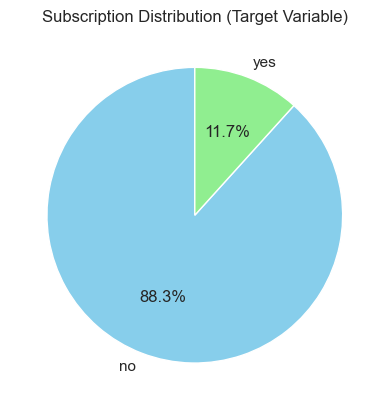

In [58]:
# Pie chart of class distribution
df['y'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], startangle=90)
plt.title('Subscription Distribution (Target Variable)')
plt.ylabel('')
plt.show()


In [59]:
# Convert categorical variables to dummy/indicator variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Show first few rows of the encoded dataset
df_encoded.head()


,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,5,261,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,44,29,5,151,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,33,2,5,76,1,-1,0,False,True,False,...,False,False,True,False,False,False,False,False,True,False
3,47,1506,5,92,1,-1,0,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,33,1,5,198,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [60]:
# Define features (X) and target (y)
X = df_encoded.drop('y_yes', axis=1)
y = df_encoded['y_yes']


In [61]:
# Print the shape
print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (45211, 42)
Target shape: (45211,)


In [62]:
from sklearn.model_selection import train_test_split

# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Print the size of each set
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (36168, 42)
X_test: (9043, 42)
y_train: (36168,)
y_test: (9043,)


In [63]:
from sklearn.tree import DecisionTreeClassifier

# Create the model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [64]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8775848722768993

Classification Report:
               precision    recall  f1-score   support

       False       0.93      0.93      0.93      7985
        True       0.48      0.50      0.49      1058

    accuracy                           0.88      9043
   macro avg       0.71      0.71      0.71      9043
weighted avg       0.88      0.88      0.88      9043


Confusion Matrix:
 [[7408  577]
 [ 530  528]]


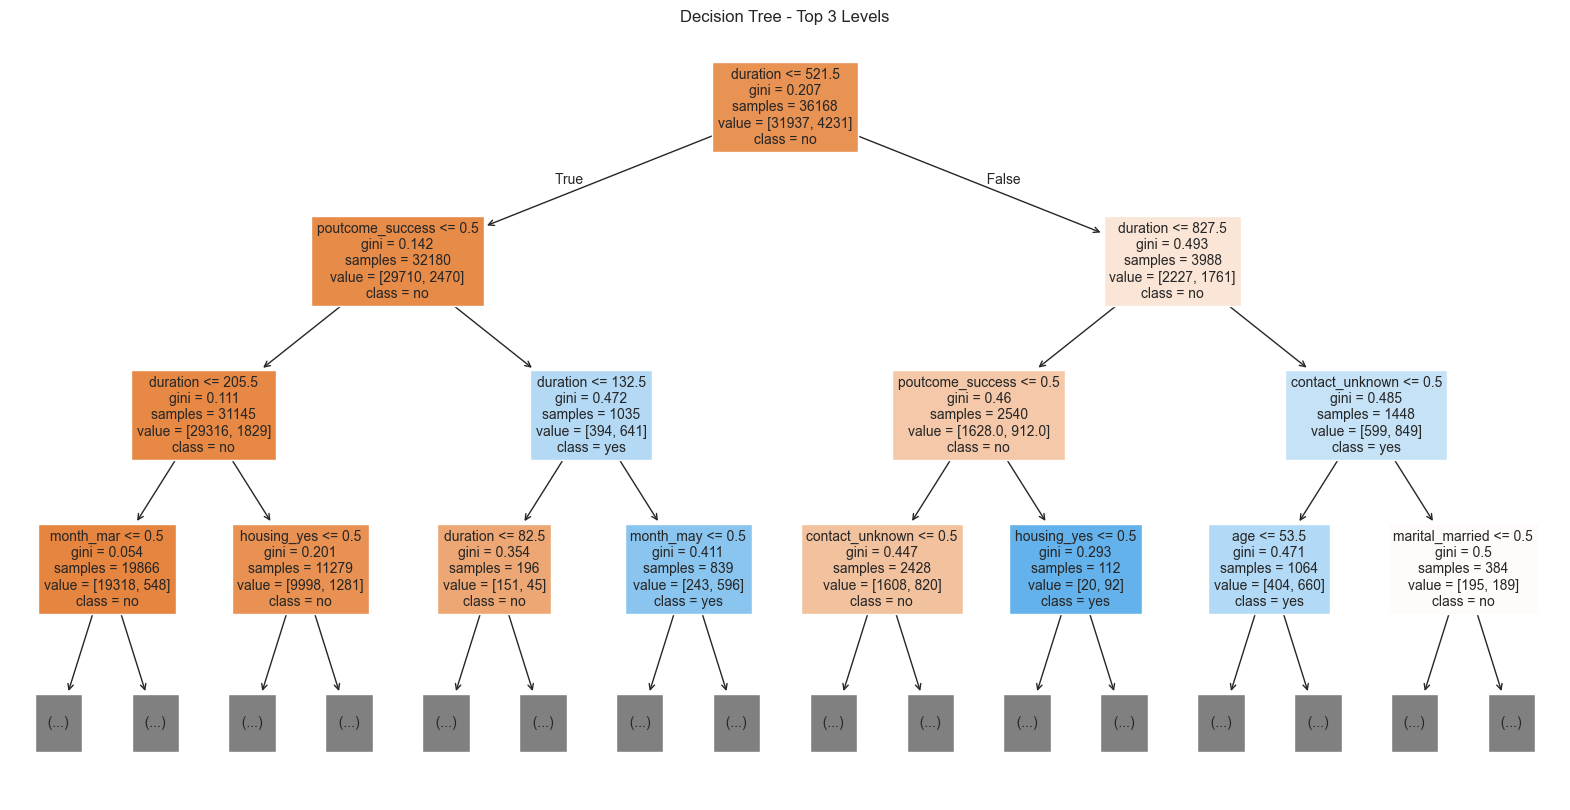

In [65]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Set plot size
plt.figure(figsize=(20, 10))

# Plot the tree (limit depth to avoid overcrowding)
plot_tree(dt_model, 
          feature_names=X.columns, 
          class_names=["no", "yes"], 
          filled=True, 
          max_depth=3,  # You can increase this if needed
          fontsize=10)

plt.title("Decision Tree - Top 3 Levels")
plt.show()
